In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
veri = pd.read_csv("Iris.csv")

In [69]:
veri.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
veri = veri.set_index("Id")

In [71]:
veri.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
veri.isnull().sum().sum() #EKSİK VERİ KONTROLÜ

0

In [73]:
veri.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [74]:
veri.info() #veri türlerini görmek için

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [75]:
import seaborn as sbn

<Axes: xlabel='Species', ylabel='count'>

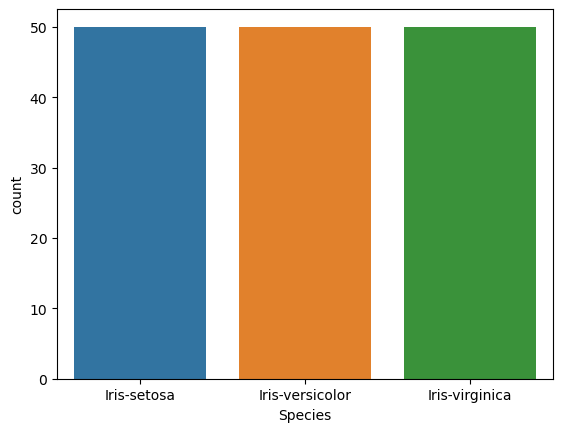

In [76]:
sbn.countplot(veri,x="Species")

In [77]:
sayisal_veri = pd.get_dummies(veri["Species"])
sayisal_veri = sayisal_veri.astype("int")

In [78]:
birlesmis_veri = pd.merge(veri, sayisal_veri, on='Id') #100 setosa 010versicolor 001 virginica

In [79]:
birlesmis_veri

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
Id,,,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
2,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
3,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
4,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
5,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0
...,...,...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,0,0,1
147,6.3,2.5,5.0,1.9,Iris-virginica,0,0,1
148,6.5,3.0,5.2,2.0,Iris-virginica,0,0,1


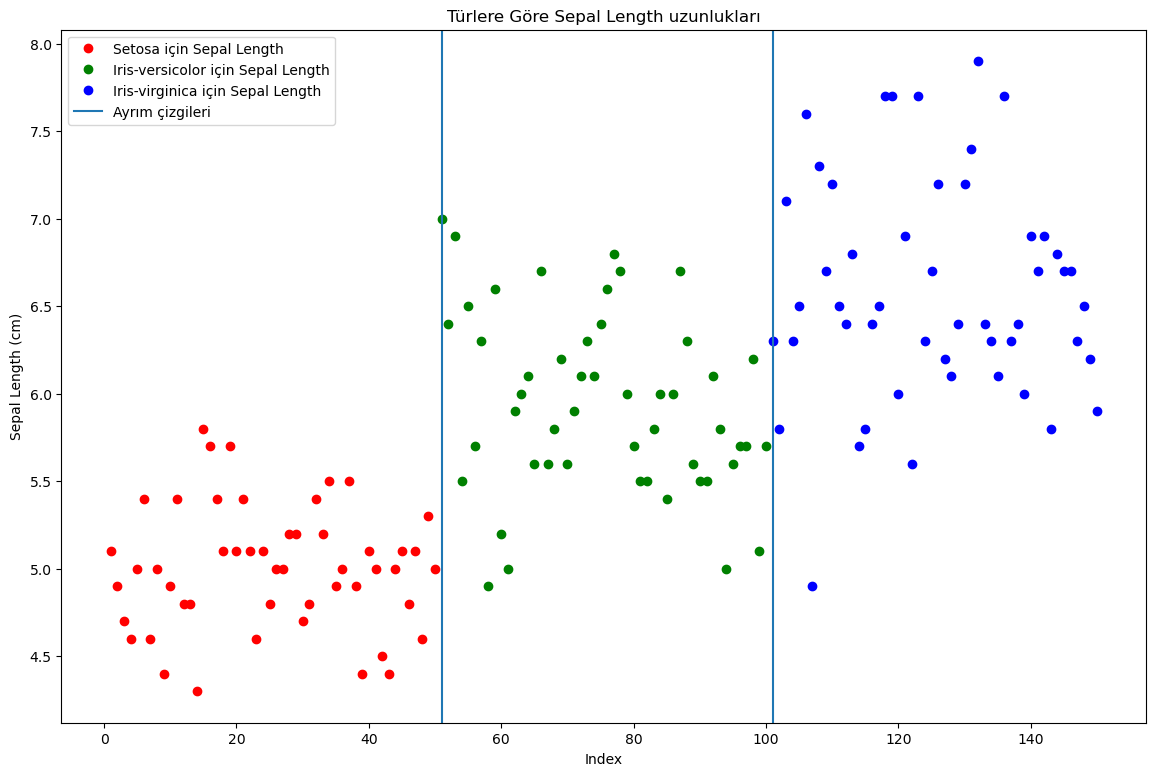

In [80]:
plt.figure(figsize=(14,9))

plt.plot(birlesmis_veri.loc[birlesmis_veri["Iris-setosa"]==1].index,
         birlesmis_veri.loc[birlesmis_veri["Iris-setosa"]==1]["SepalLengthCm"],"o",
         label="Setosa için Sepal Length", color="red")

plt.plot(birlesmis_veri.loc[birlesmis_veri["Iris-versicolor"]==1].index,
         birlesmis_veri.loc[birlesmis_veri["Iris-versicolor"]==1]["SepalLengthCm"],"o",
         label="Iris-versicolor için Sepal Length", color="green")

plt.plot(birlesmis_veri.loc[birlesmis_veri["Iris-virginica"]==1].index,
         birlesmis_veri.loc[birlesmis_veri["Iris-virginica"]==1]["SepalLengthCm"],"o",
         label="Iris-virginica için Sepal Length", color="blue")
plt.axvline(51,label="Ayrım çizgileri")
plt.axvline(101) #y eksenine çizgi çeker
plt.xlabel('Index')
plt.ylabel('Sepal Length (cm)')
plt.title("Türlere Göre Sepal Length uzunlukları")
plt.legend()
plt.show()


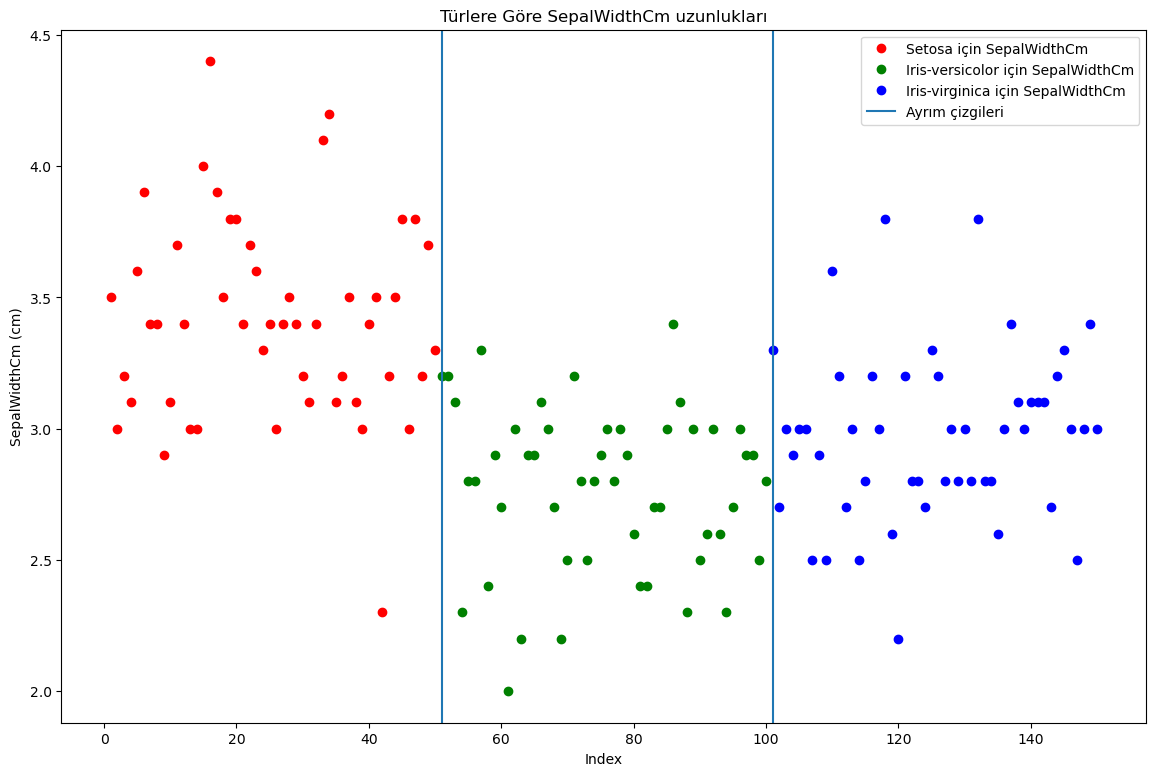

In [81]:
plt.figure(figsize=(14,9))

plt.plot(birlesmis_veri.loc[birlesmis_veri["Iris-setosa"]==1].index,
         birlesmis_veri.loc[birlesmis_veri["Iris-setosa"]==1]["SepalWidthCm"],"o",
         label="Setosa için SepalWidthCm", color="red")

plt.plot(birlesmis_veri.loc[birlesmis_veri["Iris-versicolor"]==1].index,
         birlesmis_veri.loc[birlesmis_veri["Iris-versicolor"]==1]["SepalWidthCm"],"o",
         label="Iris-versicolor için SepalWidthCm", color="green")

plt.plot(birlesmis_veri.loc[birlesmis_veri["Iris-virginica"]==1].index,
         birlesmis_veri.loc[birlesmis_veri["Iris-virginica"]==1]["SepalWidthCm"],"o",
         label="Iris-virginica için SepalWidthCm", color="blue")
plt.axvline(51,label="Ayrım çizgileri")
plt.axvline(101)
plt.xlabel('Index')
plt.ylabel('SepalWidthCm (cm)')
plt.title("Türlere Göre SepalWidthCm uzunlukları")
plt.legend()
plt.show()


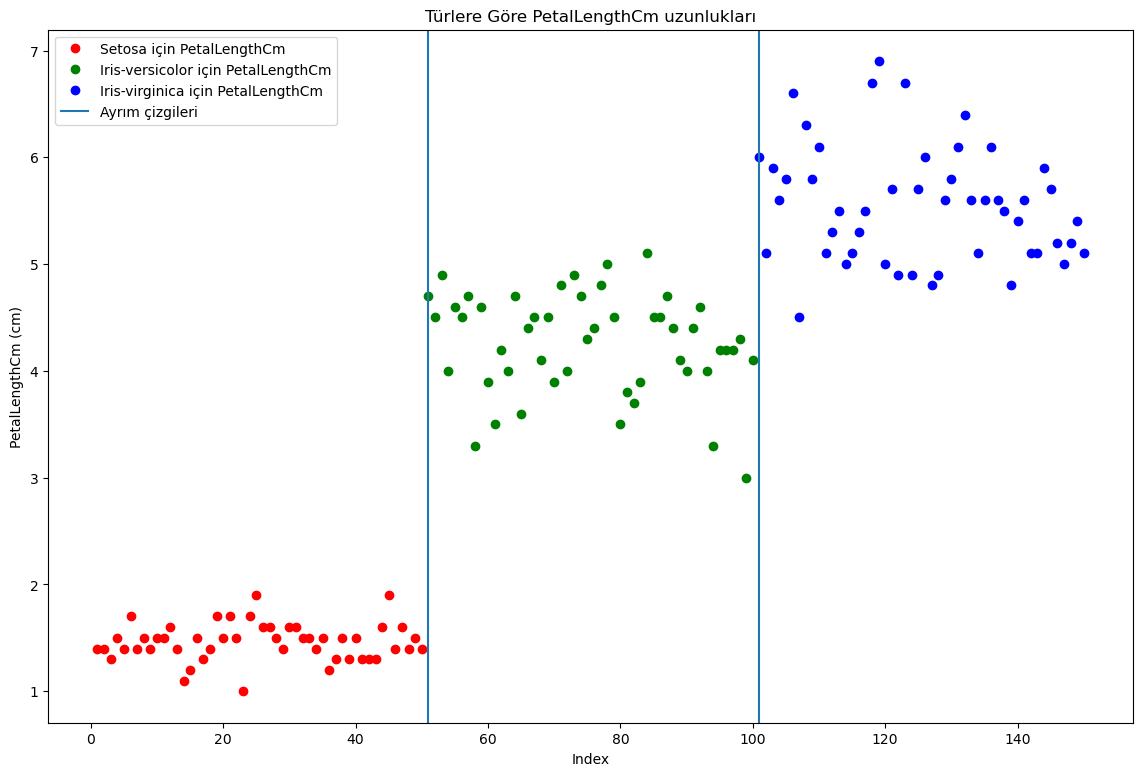

In [82]:
plt.figure(figsize=(14,9))

plt.plot(birlesmis_veri.loc[birlesmis_veri["Iris-setosa"]==1].index,
         birlesmis_veri.loc[birlesmis_veri["Iris-setosa"]==1]["PetalLengthCm"],"o",
         label="Setosa için PetalLengthCm", color="red")

plt.plot(birlesmis_veri.loc[birlesmis_veri["Iris-versicolor"]==1].index,
         birlesmis_veri.loc[birlesmis_veri["Iris-versicolor"]==1]["PetalLengthCm"],"o",
         label="Iris-versicolor için PetalLengthCm", color="green")

plt.plot(birlesmis_veri.loc[birlesmis_veri["Iris-virginica"]==1].index,
         birlesmis_veri.loc[birlesmis_veri["Iris-virginica"]==1]["PetalLengthCm"],"o",
         label="Iris-virginica için PetalLengthCm", color="blue")
plt.axvline(51,label="Ayrım çizgileri")
plt.axvline(101)
plt.xlabel('Index')
plt.ylabel('PetalLengthCm (cm)')
plt.title("Türlere Göre PetalLengthCm uzunlukları")
plt.legend()
plt.show()


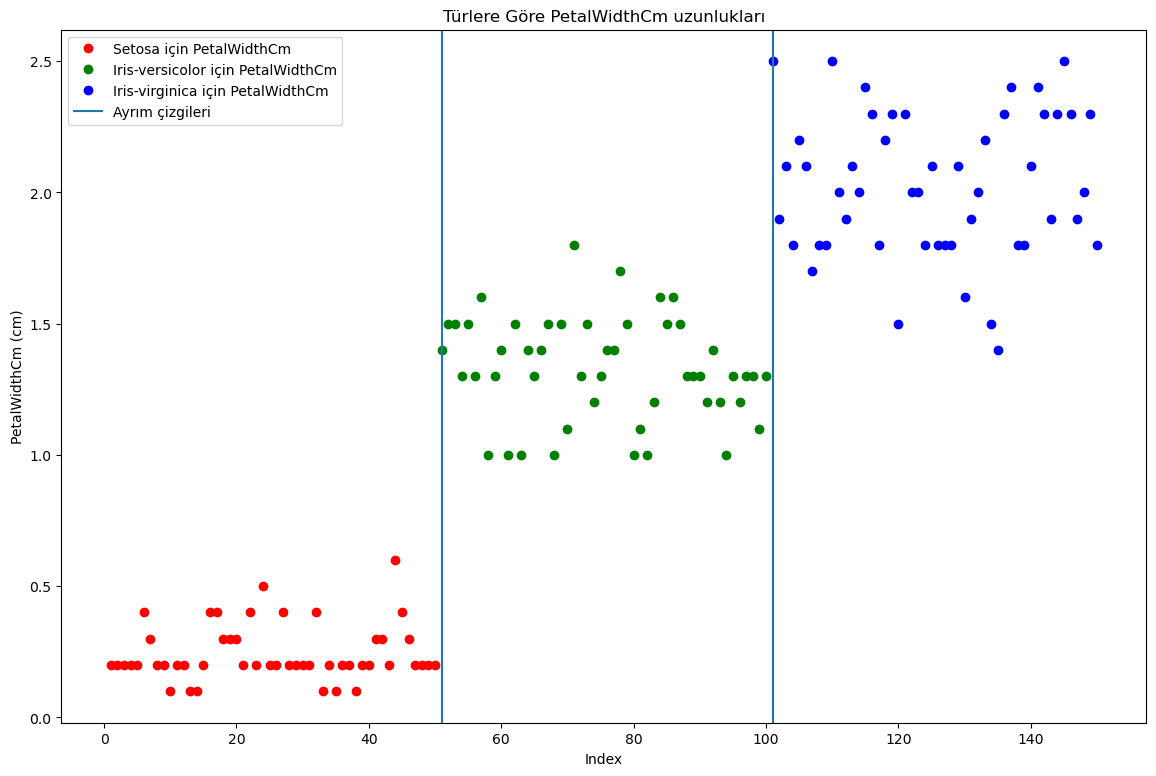

In [83]:
plt.figure(figsize=(14,9))

plt.plot(birlesmis_veri.loc[birlesmis_veri["Iris-setosa"]==1].index,
         birlesmis_veri.loc[birlesmis_veri["Iris-setosa"]==1]["PetalWidthCm"],"o",
         label="Setosa için PetalWidthCm", color="red")

plt.plot(birlesmis_veri.loc[birlesmis_veri["Iris-versicolor"]==1].index,
         birlesmis_veri.loc[birlesmis_veri["Iris-versicolor"]==1]["PetalWidthCm"],"o",
         label="Iris-versicolor için PetalWidthCm", color="green")

plt.plot(birlesmis_veri.loc[birlesmis_veri["Iris-virginica"]==1].index,
         birlesmis_veri.loc[birlesmis_veri["Iris-virginica"]==1]["PetalWidthCm"],"o",
         label="Iris-virginica için PetalWidthCm", color="blue")
plt.axvline(51,label="Ayrım çizgileri")
plt.axvline(101)
plt.xlabel('Index')
plt.ylabel('PetalWidthCm (cm)')
plt.title("Türlere Göre PetalWidthCm uzunlukları")
plt.legend()
plt.show()

In [84]:
birlesmis_veri = birlesmis_veri.drop("Species",axis=1)

<Axes: >

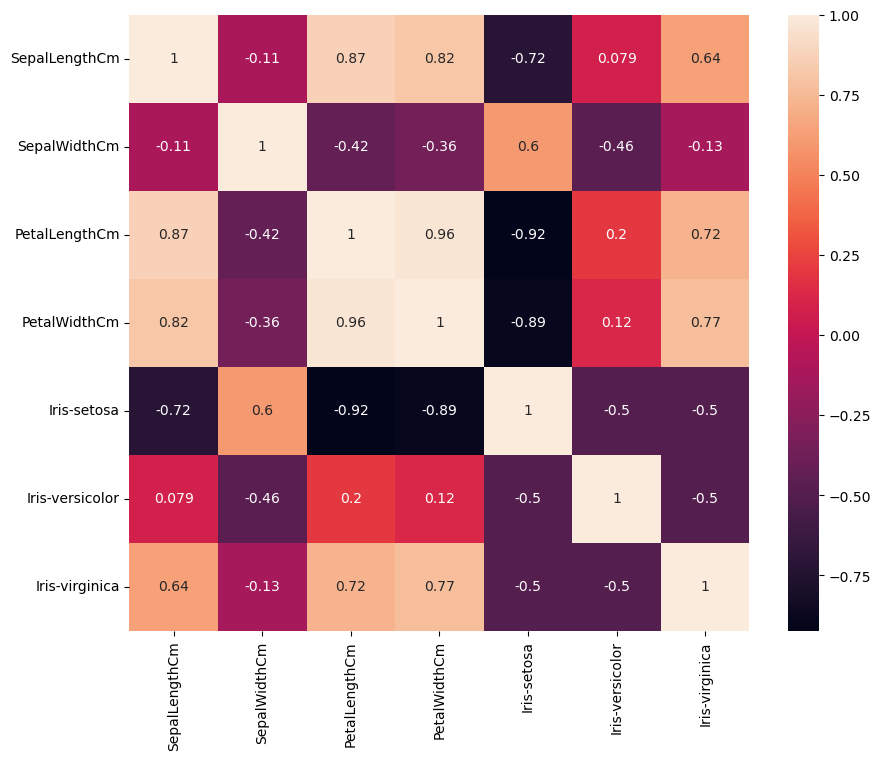

In [85]:
plt.figure(figsize=(10,8))
corr = birlesmis_veri.corr()
sbn.heatmap(corr,annot=True)

<Axes: >

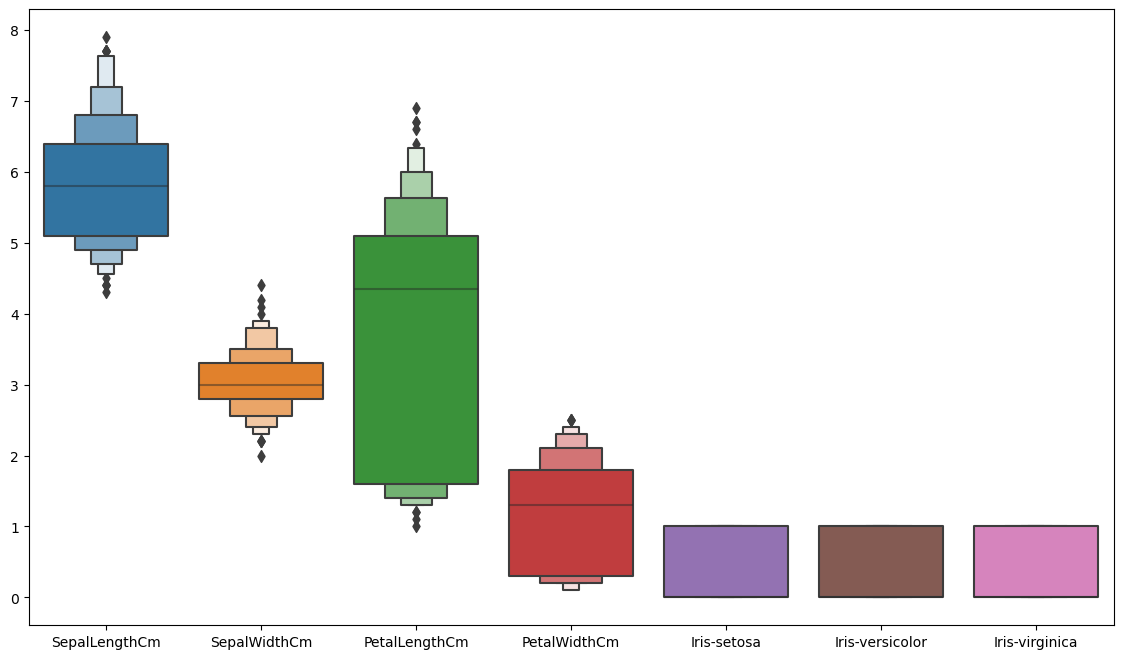

In [51]:
plt.figure(figsize=(14,8))
sbn.boxenplot(birlesmis_veri) #aykırı veri kontrolü

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [53]:
list(birlesmis_veri.columns)[4:7]

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [54]:
X_Degerleri = birlesmis_veri[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm',]].values

In [55]:
y_degerleri = birlesmis_veri[['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']].values

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()

In [58]:
X_Degerleri = scaler.fit_transform(X_Degerleri)

In [59]:
x_train,x_test,y_train,y_test = train_test_split(X_Degerleri,y_degerleri,test_size=0.33)

In [60]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.98


In [86]:
from sklearn import metrics
y_test_single = np.argmax(y_test, axis=1)
y_pred_single = np.argmax(y_pred, axis=1)

confusion_matrix = metrics.confusion_matrix(y_test_single, y_pred_single)
print("Confusion Matrix KNN için:")
print(confusion_matrix)

Confusion Matrix KNN için:
[[16  0  0]
 [ 0 19  0]
 [ 0  1 14]]


In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [64]:
t = model.predict(x_test)

In [87]:
y_test_single = np.argmax(y_test, axis=1)
y_pred_single = np.argmax(y_pred, axis=1)

confusion_matrix = metrics.confusion_matrix(y_test_single, y_pred_single)
print("Confusion Matrix  RandomForest İÇİN:")
print(confusion_matrix)

Confusion Matrix  RandomForest İÇİN:
[[16  0  0]
 [ 0 19  0]
 [ 0  1 14]]


In [88]:
from sklearn.metrics import f1_score

# Assuming y_true and y_pred are your true labels and predicted labels respectively
f1 = f1_score(y_test_single, y_pred_single,average="macro")

print("F1 Scor RandomForest için", f1)

F1 Scor RandomForest için 0.9799587385794283
